# BiSection

We want to solve the equation $f(x) = 0$.

In [2]:
"""
Use BiSection algorithm to find the root of the function \$f(x)\$ between \$(a, b)\$.
"""
function BiSection(f, a, b)
    
end 

BiSection

In [3]:
@doc BiSection

Use BiSection algorithm to find the root of the function $f(x)$ between $(a, b)$.


In [4]:
?BiSection

search: BiSection



Use BiSection algorithm to find the root of the function $f(x)$ between $(a, b)$.


In [5]:
function BiSection(f, a, b)
    if sign(f(a)) == sign(f(b))
        error("Must be different signs")
    end
end 

BiSection (generic function with 1 method)

In [6]:
?error

search: error errormonitor ErrorException @error showerror LoadError InitError



```
error(message::AbstractString)
```

Raise an `ErrorException` with the given message.

---

```
error(msg...)
```

Raise an `ErrorException` with the given message.


In [7]:
?sign

search: sign signed Signed signbit significand Unsigned unsigned flipsign



```
sign(x)
```

Return zero if `x==0` and $x/|x|$ otherwise (i.e., ±1 for real `x`).

See also [`signbit`](@ref), [`zero`](@ref), [`copysign`](@ref), [`flipsign`](@ref).

# Examples

```jldoctest
julia> sign(-4.0)
-1.0

julia> sign(99)
1

julia> sign(-0.0)
-0.0

julia> sign(0 + im)
0.0 + 1.0im
```


In [8]:
f(x) = x^2 - 2

f (generic function with 1 method)

In [9]:
BiSection(f, 5, 6)

LoadError: Must be different signs

In [10]:
function BiSection(f, a, b, ϵ=1e-10)
    if sign(f(a)) == sign(f(b))
        error("Must be different signs")
    end
    
    m = a  # m exists outside the while-loop
    while abs(b - a) > ϵ   # the distance between a and b
        m = 0.5 * (a + b)
        if sign(f(m)) == sign(f(a))
            (a, b) = (m, b)
        else 
            (a, b) = (a, m)
        end
    end
    
    return m
end 

BiSection (generic function with 2 methods)

In [11]:
BiSection(f, big(-1.0), big(2.0), 1e-20)

1.414213562373095048806139720394547953929986761067993938922882080078125

In [12]:
setprecision(BigFloat, 1000)

1000

In [13]:
s = BiSection(f, big(-1.0), big(2.0), 1e-100)

1.41421356237309504880168872420969807856967187537694807317667973799073247846210703885038753432764157267795170990300854578218647890023910068427390481676032154188358256812443168905840608224585193667954003334579866917245655143073866115489102598892879430546029609021895163691129241917762866307095017889827737

In [14]:
s - sqrt(big(2.0))

-5.70621363279037512427383571556116365283702166803396142895296400978030739036973938682553008453810314367637613024335137231038582008598374914297120948931492562390115326718030290316621339405570450725097122682278642629869025842781960462121906355527679988353654866560967496569760530368846833134756862129116287e-101

In [15]:
function BiSection(f, a, b, ϵ=1e-10)
    if sign(f(a)) == sign(f(b))
        error("Must be different signs")
    end
    
#     m = a  # m exists outside the while-loop
    ms = [a]  # create an array and its first element is a
    while abs(b - a) > ϵ   # the distance between a and b
        m = 0.5 * (a + b)
        if sign(f(m)) == sign(f(a))
            (a, b) = (m, b)
        else 
            (a, b) = (a, m)
        end
        
        push!(ms, m)  # ! means that it will modify the first argument
    end
    
    return ms
end 

BiSection (generic function with 2 methods)

In [16]:
BiSection(f, -1.0, 2.0)

36-element Vector{Float64}:
 -1.0
  0.5
  1.25
  1.625
  1.4375
  1.34375
  1.390625
  1.4140625
  1.42578125
  1.419921875
  1.4169921875
  1.41552734375
  1.414794921875
  ⋮
  1.4142135977745056
  1.4142135083675385
  1.414213553071022
  1.4142135754227638
  1.414213564246893
  1.4142135586589575
  1.4142135614529252
  1.414213562849909
  1.4142135621514171
  1.414213562500663
  1.4142135623260401
  1.4142135624133516

In [17]:
# anonymous function
xs = BiSection(x->x^2- 2, -1.0, 2.0)

36-element Vector{Float64}:
 -1.0
  0.5
  1.25
  1.625
  1.4375
  1.34375
  1.390625
  1.4140625
  1.42578125
  1.419921875
  1.4169921875
  1.41552734375
  1.414794921875
  ⋮
  1.4142135977745056
  1.4142135083675385
  1.414213553071022
  1.4142135754227638
  1.414213564246893
  1.4142135586589575
  1.4142135614529252
  1.414213562849909
  1.4142135621514171
  1.414213562500663
  1.4142135623260401
  1.4142135624133516

# Plots

In [18]:
using Plots

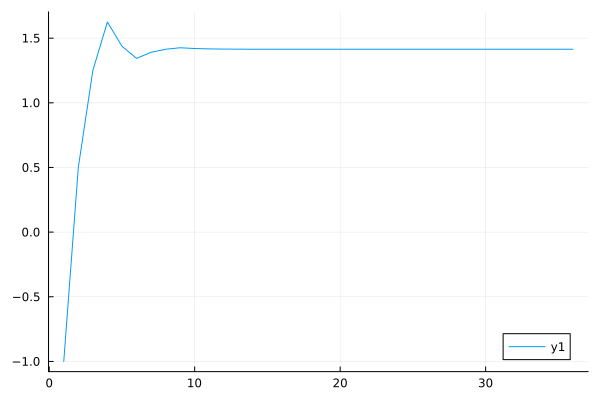

In [19]:
plot(xs)

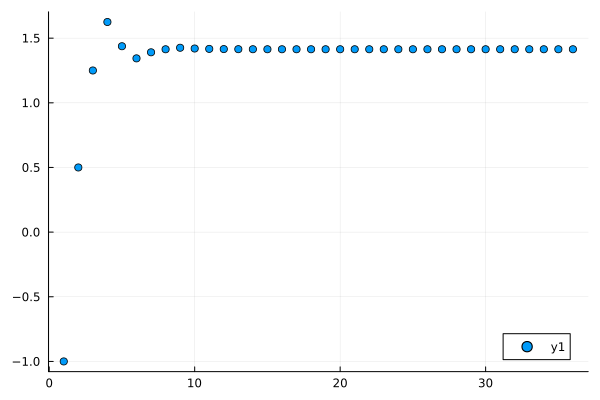

In [20]:
scatter(xs)

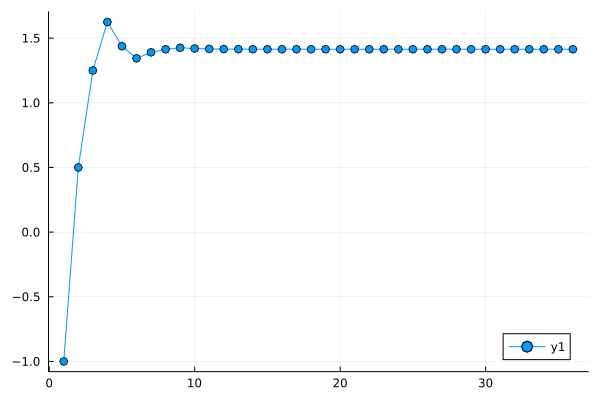

In [21]:
plot(xs, m=:o)  # : means Symbol (think of it as a special string)

# Error analysis

In [22]:
δe = xs - xs[end] # error: because it does not how to perform the operation '-' with a vector and a scalar.

LoadError: MethodError: no method matching -(::Vector{Float64}, ::Float64)
For element-wise subtraction, use broadcasting with dot syntax: array .- scalar

[0mClosest candidates are:
[0m  -([91m::T[39m, ::T) where T<:Union{Float16, Float32, Float64}
[0m[90m   @[39m [90mBase[39m [90m[4mfloat.jl:409[24m[39m
[0m  -([91m::LinearAlgebra.UniformScaling[39m, ::Number)
[0m[90m   @[39m [36mLinearAlgebra[39m [90m~/.local/share/julia-1.9.0/share/julia/stdlib/v1.9/LinearAlgebra/src/[39m[90m[4muniformscaling.jl:146[24m[39m
[0m  -([91m::AbstractGray{Bool}[39m, ::Number)
[0m[90m   @[39m [32mColorVectorSpace[39m [90m~/.julia/packages/ColorVectorSpace/QI5vM/src/[39m[90m[4mColorVectorSpace.jl:342[24m[39m
[0m  ...


In [23]:
δe = xs .- xs[end]  # '.' means that perform the operation element by element.

36-element Vector{Float64}:
 -2.4142135624133516
 -0.9142135624133516
 -0.1642135624133516
  0.2107864375866484
  0.02328643758664839
 -0.07046356241335161
 -0.02358856241335161
 -0.0001510624133516103
  0.01156768758664839
  0.00570831258664839
  0.0027786250866483897
  0.0013137813366483897
  0.0005813594616483897
  ⋮
  3.536115400493145e-8
 -5.404581315815449e-8
 -9.342329576611519e-9
  1.3009412214159966e-8
  1.8335413187742233e-9
 -3.754394128918648e-9
 -9.604264050722122e-10
  4.3655745685100555e-10
 -2.6193447411060333e-10
  8.731149137020111e-11
 -8.731149137020111e-11
  0.0

In [24]:
# because we do not want to compute the distance between the last element and element
δe = abs.(xs[1:end-1] .- xs[end])  # [1, end-1], δe means the distance bewteen an element to the last element

35-element Vector{Float64}:
 2.4142135624133516
 0.9142135624133516
 0.1642135624133516
 0.2107864375866484
 0.02328643758664839
 0.07046356241335161
 0.02358856241335161
 0.0001510624133516103
 0.01156768758664839
 0.00570831258664839
 0.0027786250866483897
 0.0013137813366483897
 0.0005813594616483897
 ⋮
 2.1417508833110332e-7
 3.536115400493145e-8
 5.404581315815449e-8
 9.342329576611519e-9
 1.3009412214159966e-8
 1.8335413187742233e-9
 3.754394128918648e-9
 9.604264050722122e-10
 4.3655745685100555e-10
 2.6193447411060333e-10
 8.731149137020111e-11
 8.731149137020111e-11

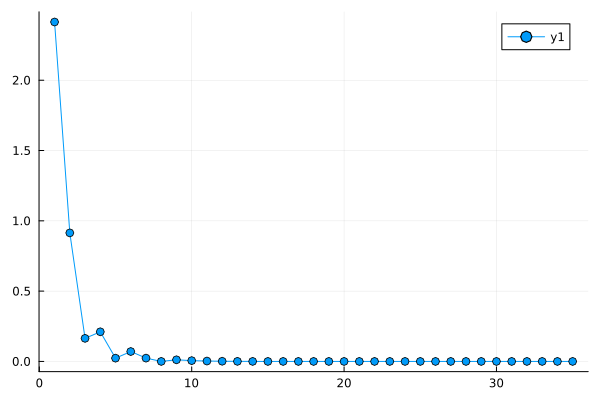

In [25]:
plot(δe, m=:o)

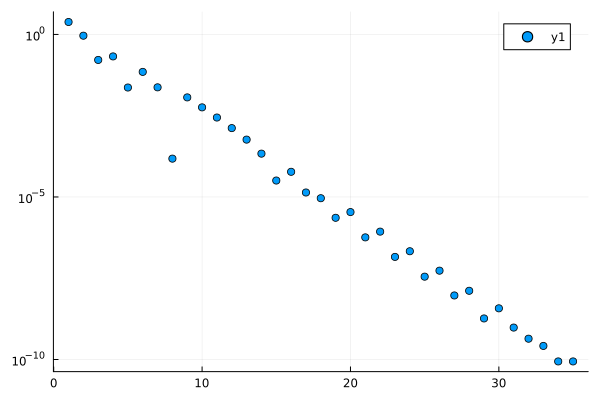

In [26]:
# How fast does the algorithm converge?
scatter(δe, yscale=:log10)

$\log_{10} \delta e = ax + b$, where $a, b$ are constants. Then, we have:
$$
    \delta e = 10^{ax + b}
$$
So, we can conclude that the order of convergence is exponential for BiSection algorithm.